In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style,rcParams
style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
import re
%matplotlib inline

In [26]:
df = pd.read_csv('/content/endsars_sentimnet2.csv')

# for the machine learning model

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



## for evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#### working with the data

In [28]:
df.head()

,content,sentiment
0,highest form intimidation offence commit give ...,neutral
1,taking life long time mbuhari sack drisapantam...,positive
2,even desmond elliot quite woman name look like...,positive
3,cbn freeze account drisapantami cbn quick free...,positive
4,obiejazzyup yelesowore mbuhari endsars mbujari...,positive


In [29]:
data = df[['content', 'sentiment']]

In [30]:
data.head()

,content,sentiment
0,highest form intimidation offence commit give ...,neutral
1,taking life long time mbuhari sack drisapantam...,positive
2,even desmond elliot quite woman name look like...,positive
3,cbn freeze account drisapantami cbn quick free...,positive
4,obiejazzyup yelesowore mbuhari endsars mbujari...,positive


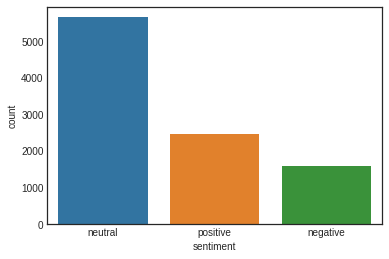

In [31]:
sns.countplot(data['sentiment'])

In [32]:
data.columns # columns of the data

Index(['content', 'sentiment'], dtype='object')

In [33]:
print('length of data is', len(data))

length of data is 9737


In [34]:
print('The shape of the data is', len(data.shape))

The shape of the data is 2


In [35]:
# checking for missing value
np.sum(data.isnull().any(axis=1))

0

In [36]:
print('Count of columns in the data is:  ', len(data.columns))
print('Count of rows in the data is:  ', len(data))

Count of columns in the data is:   2
Count of rows in the data is:   9737


In [37]:
data['sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In order to sample the data well, we are going to have a fuction that make 1-2 (Negative) == 1, 2 (Neutral) and 4-5 (Positive) == 3

In [38]:
def sample(x):
  if x == 'negative':
    return 0 # negative word
  elif x == 'neutral':
    return 1 # neutral word
  else:
    return 2 # positive word

In [39]:
data['sentiment'] = data['sentiment'].apply(sample)

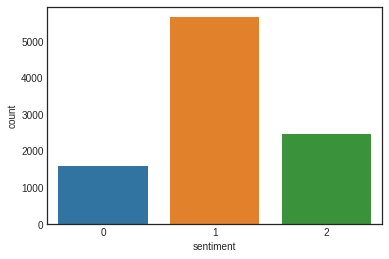

In [40]:
sns.countplot(data['sentiment'])

In [41]:
data['sentiment'].value_counts(normalize=True) *100

1    58.139057
2    25.377426
0    16.483516
Name: sentiment, dtype: float64

## Transforming the data and machine learning

## Creating bag of word using python count vectorizer.

Bag-of-Words is a method to represent text into numerical features. Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

In [42]:
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

## seperating the data into train and test data

Here will be using train_split stratified with y to have teh same percentage of each class in train and test data

In [43]:
X=data['content']
y=data['sentiment']

In [44]:
data.shape

(9737, 2)

In [45]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =2021, stratify=y)

In [46]:
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (7789,)
Shape of the y_train (7789,)
Shape of the X_test (1948,)
Shape of the y_test (1948,)


In [47]:


# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
ctv.fit(list(X_train) + list(X_test))
X_train =  ctv.transform(X_train) 
X_test = ctv.transform(X_test)

## Comparing various machine learning model and check the accuracy

1. Support Vector Classifier

2. Decision Tree Classifier

3. Random Forest Classifier

3. Xgboost Classifier

In [49]:
algos = [SVC(C=3.0, class_weight='balanced', random_state=0), 
        RandomForestClassifier(max_depth=5,n_estimators=1000, max_features='auto', class_weight='balanced'),
        DecisionTreeClassifier(max_depth=5),
         XGBClassifier(n_estimators=1000, learning_rate=0.1)]

names = ['Support_Vector_Machine',  'RandomForest','Decision_Tree','XGBClassifier']
accuracy_list = []

In [50]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy)

In [51]:
evaluation = pd.DataFrame({'Model': names,
                           'Accuracy_Score': accuracy_list})

In [52]:
evaluation.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score
3,XGBClassifier,0.893224
0,Support_Vector_Machine,0.769507
1,RandomForest,0.729979
2,Decision_Tree,0.658624


In [53]:
evalaution = evaluation.sort_values(by='Accuracy_Score', ascending=False).reset_index(drop=True)

In [54]:
evalaution

,Model,Accuracy_Score
0,XGBClassifier,0.893224
1,Support_Vector_Machine,0.769507
2,RandomForest,0.729979
3,Decision_Tree,0.658624


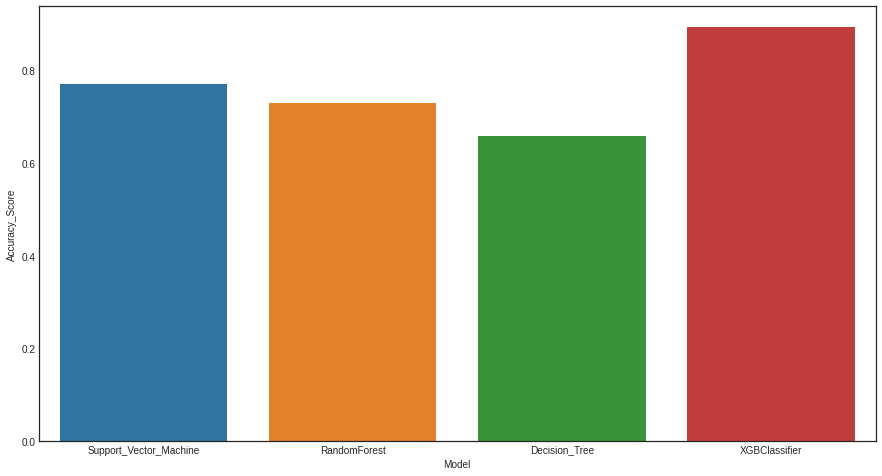

In [55]:
rcParams['figure.figsize'] = 15,8
sns.barplot(data=evaluation,x='Model', y='Accuracy_Score')